<a href="https://colab.research.google.com/github/martinamanu/PCVK_genap_2021/blob/main/Image_Processing_in_Python_Final_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Langkah1: Memuat Dependensi

> Bagian ini memuat beberapa pustaka yang diperlukan : **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) adalah perpustakaan manipulasi array, digunakan untuk aljabar linier, transformasi Fourier, dan kemampuan bilangan acak.
*   [Pandas](https://pandas.pydata.org/) adalah perpustakaan untuk manipulasi data dan analisis data.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) adalah perpustakaan untuk tugas visi komputer.
*   [Skimage](https://scikit-image.org/) adalah library yang mendukung aplikasi pengolah gambar pada python.
*   [Matplotlib](https://matplotlib.org/) adalah perpustakaan yang menghasilkan angka dan menyediakan toolkit antarmuka pengguna grafis.









In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # untuk display foto
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

##Langkah2: membaca gambar dari url

> Pada langkah ini kita akan membaca gambar dari url, dan menampilkannya menggunakan openCV.

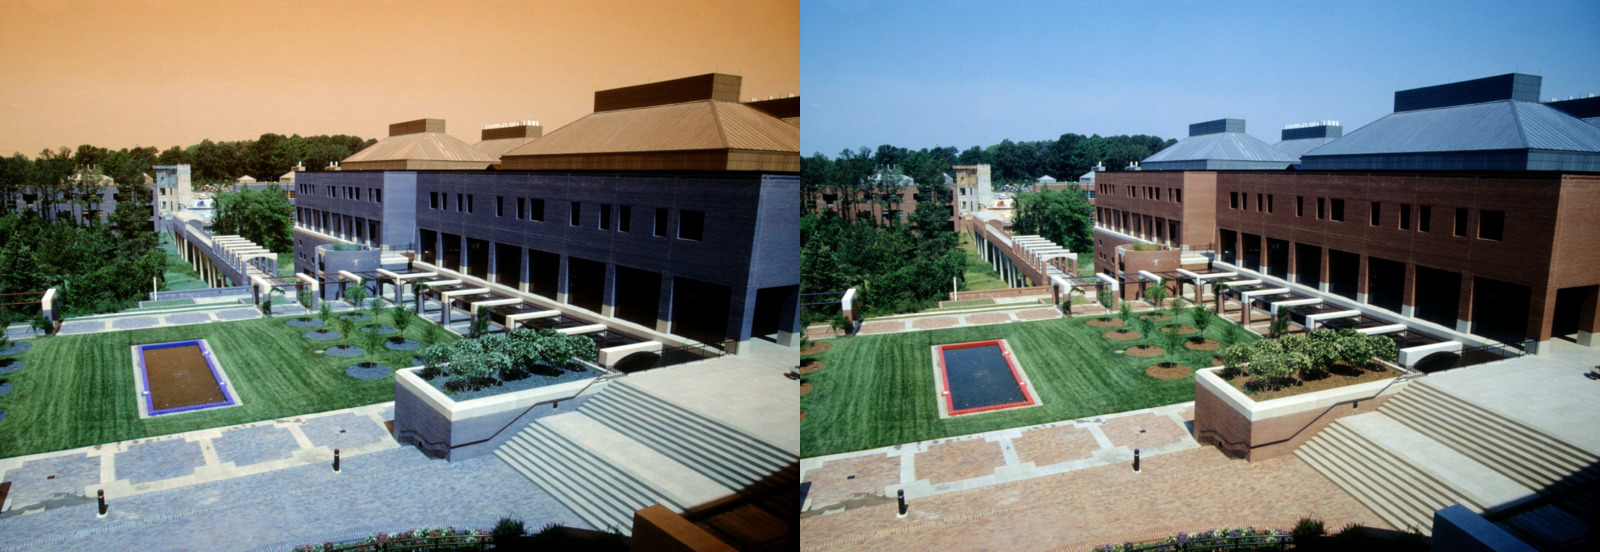

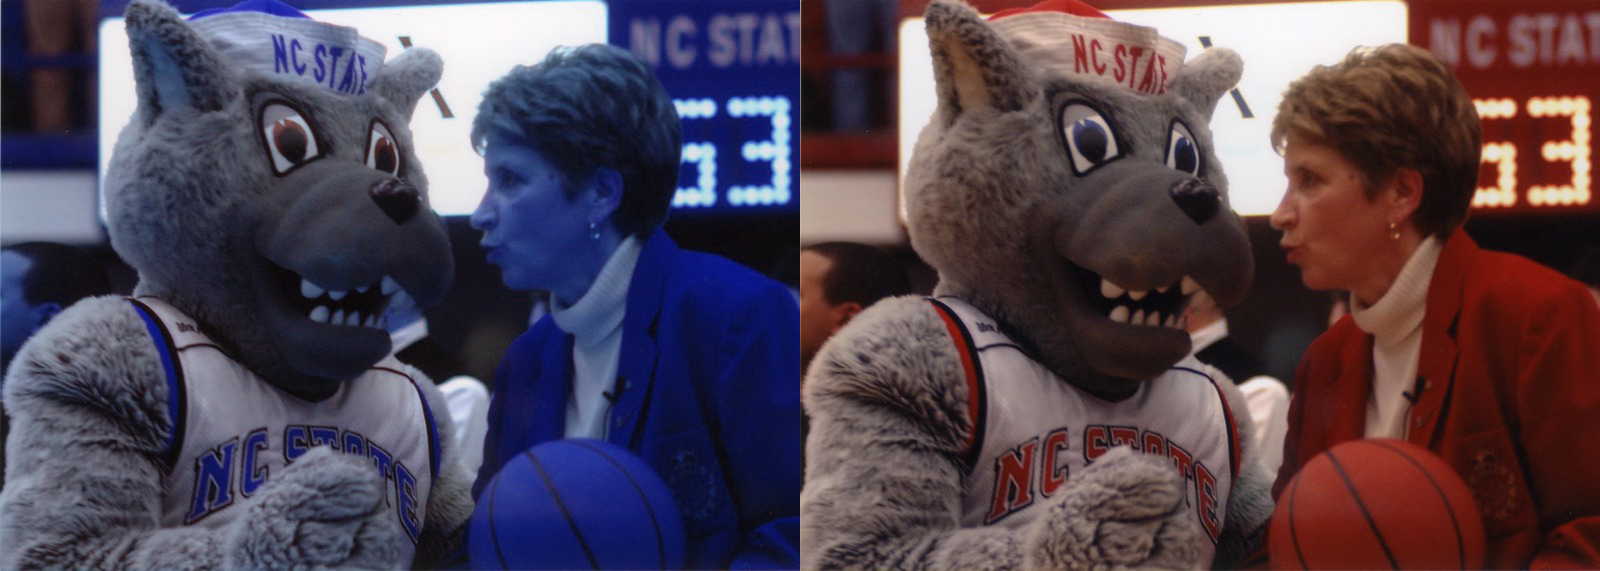

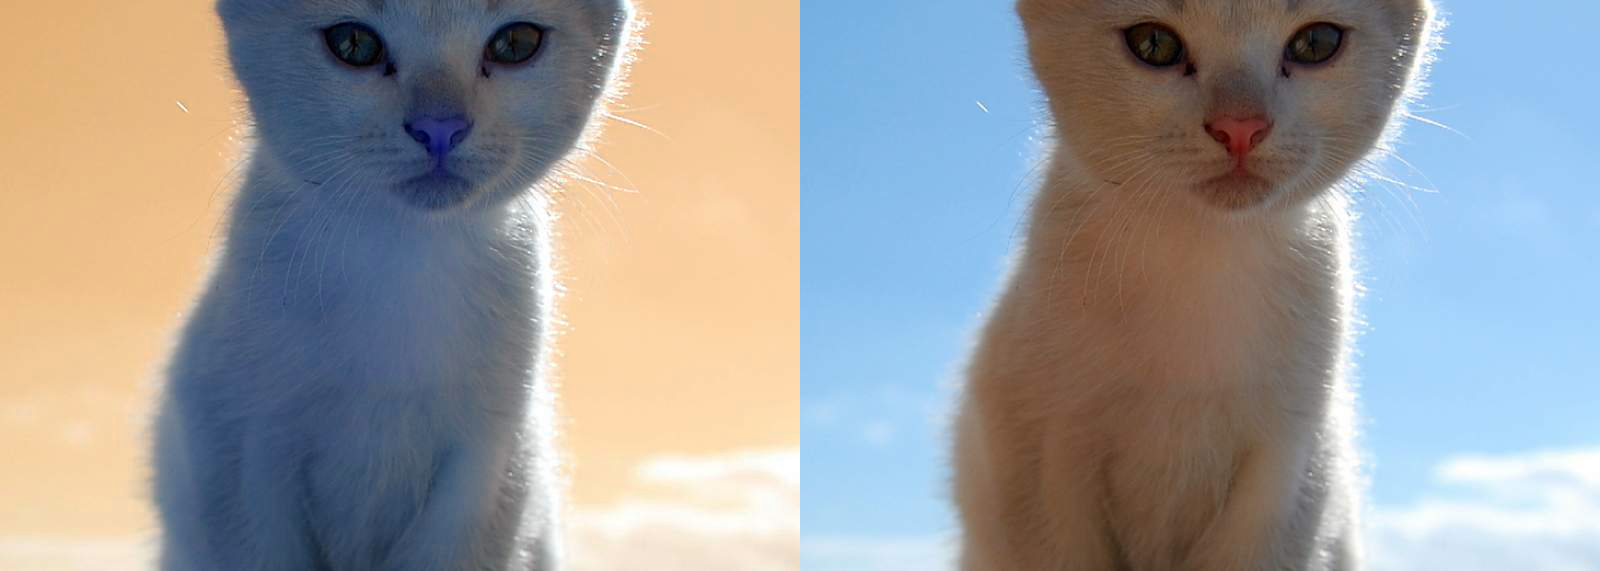

In [2]:
# Buat daftar untuk menyimpan url gambar
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]  
# Menampilkan gambar

for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

In [3]:
## TODO: LOAD IMAGE
## url = 
## myImg = io.imread(url)  
## cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))


##Langkah3: Image Contours and Histograms

In [4]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
571
800
3


### Menghasilkan Histogram gambar berwarna dan gambar skala abu-abu


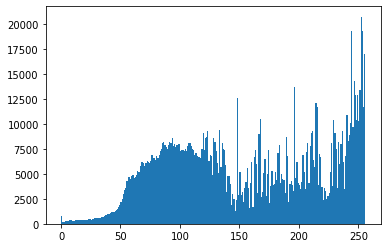

In [5]:
# Untuk membuat histogram dari data gambar kita, kita menggunakan fungsi `hist()` matplot.pylab.
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

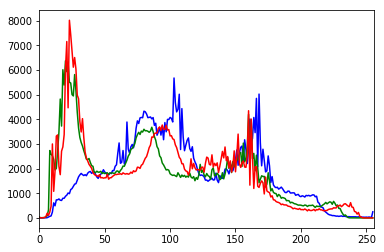

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

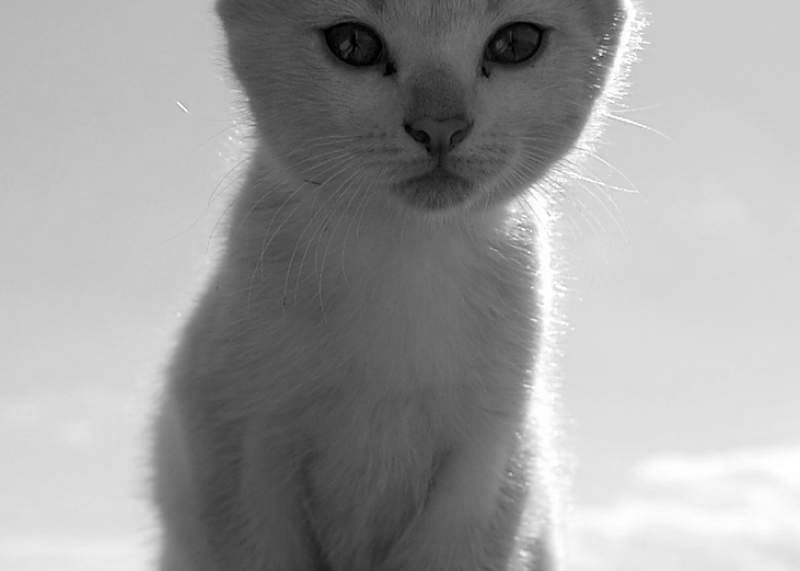

In [9]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

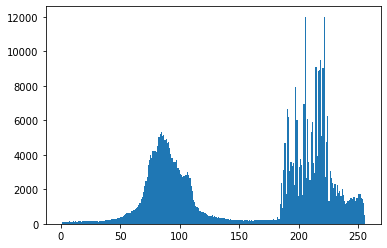

In [10]:
# Plot histogram dari citra abu-abu. Kita dapat mengamati bahwa frekuensi
# hist gambar telah berkurang ~ 1/3 dari histogram gambar berwarna
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

### Temukan kontur gambar dari gambar skala abu-abu

Method 1: gunakan matplotlib. contour

More Info: [matplotlib contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html)

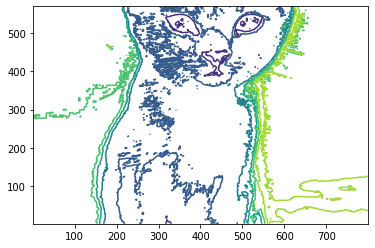

In [15]:
plt.contour(gray_image, origin = "image")

Method 2: Gunakan openCV lib

More info: [Contour](https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html)

In [23]:
# Tetapkan ambang batas untuk deteksi kontur
ret, thresh = cv.threshold(gray_image,150,255,0)
image, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)

ValueError: ignored

In [ ]:
# Your code
# plt.contour()

##Langkah4: Transformasi Grayscale dan Persamaan Histogram


### Transformasi Grayscale
Bagian ini memberikan beberapa contoh melakukan transformasi matematis dari gambar skala abu-abu

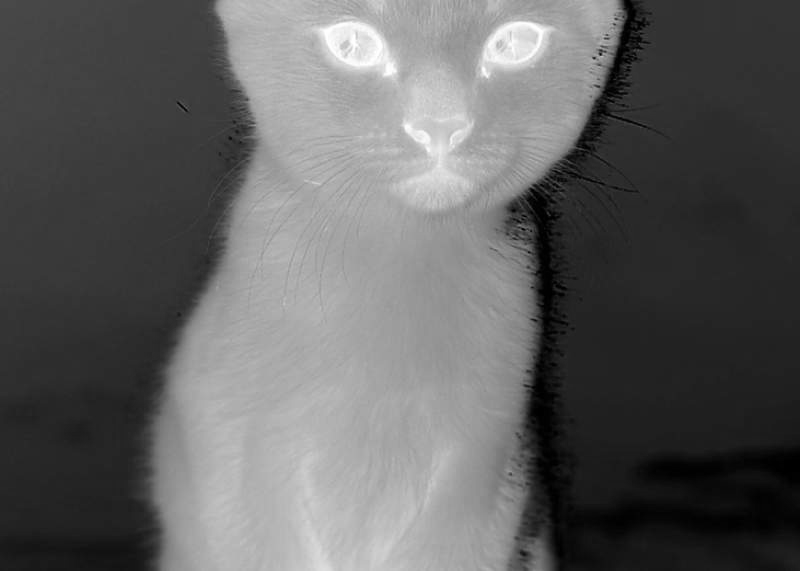

In [12]:
# Ini adalah operasi kebalikan dari gambar skala abu-abu, kita dapat melihat bahwa
# piksel terang menjadi gelap, dan piksel gelap menjadi terang
im2 = 255 - gray_image
cv2_imshow(im2)

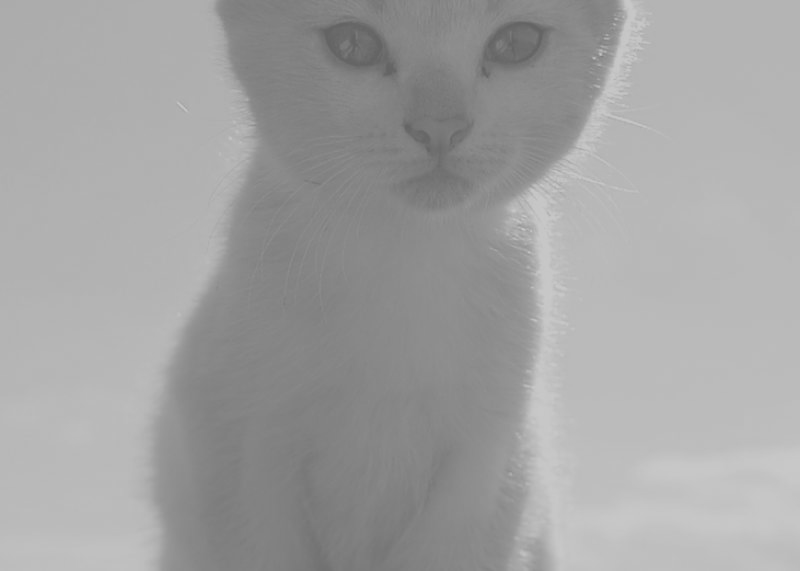

In [13]:
# Transformasi lain dari gambar, setelah menambahkan konstanta, 
# semua piksel menjadi lebih cerah dan efek gambar seperti perpeloncoan dihasilkan
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

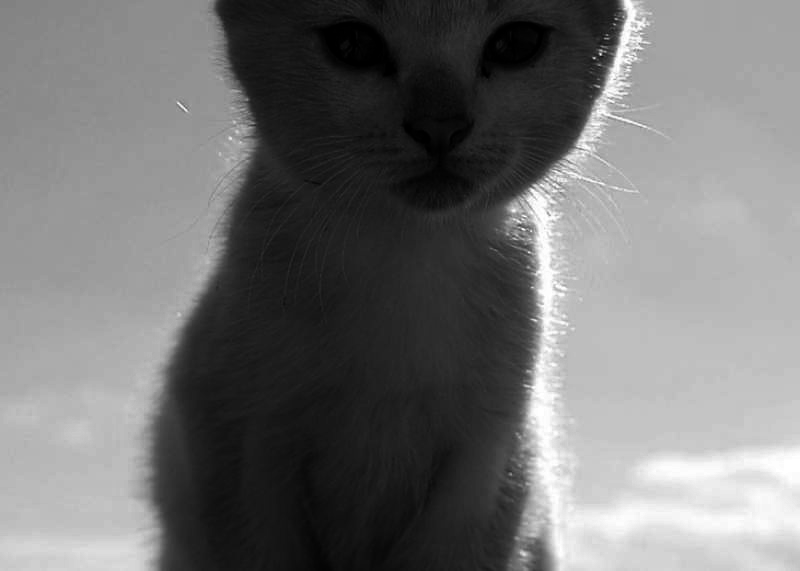

In [17]:
# Tingkat kecerahan gambar_abu-abu berkurang setelah langkah ini
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

### Persamaan Histogram
Bagian ini menunjukkan pemerataan histogram pada gambar gelap. Transformasi ini meratakan histogram tingkat keabuan sehingga semua intensitas menjadi sama umum mungkin. Fungsi transformasi adalah fungsi distribusi kumulatif (cdf) dari nilai piksel pada citra (dinormalisasi untuk memetakan rentang nilai piksel ke rentang yang diinginkan). Contoh ini menggunakan gambar 4 (im4).

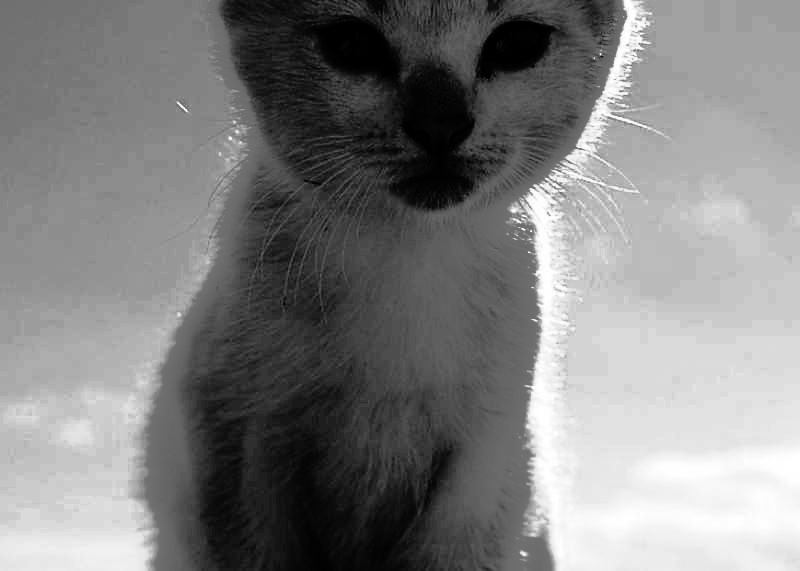

In [18]:
# fungsi pemerataan histogram
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # dapatkan gambar histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # fungsi distribusi kumulatif
  cdf = imhist.max()*cdf/cdf.max()  #normalisasi
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# terapkan fungsi pada gambar gelap untuk meningkatkan kontras
# kita dapat mengamati bahwa kontras latar belakang hitam telah meningkat
im5 = histeq(im4)
cv2_imshow(im5)

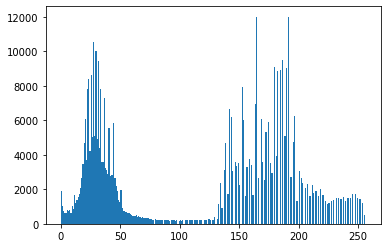

In [19]:
# Ekstra: coba visualisasikan histogram gambar setelah pemerataan histogram
# Sebelum pemerataan histogram
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

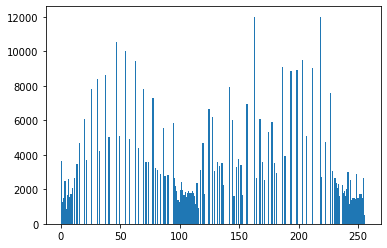

In [20]:
# Setelah visualisasi histogram
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

##Langkah5: Transformasi Fourier dari Gambar Abu-abu
[FFT](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)
> Transformasi fourier digunakan untuk mencari frekuensi domian suatu citra. Kita dapat menganggap gambar sebagai sinyal yang diambil sampelnya dalam dua arah. Jadi mengambil transformasi fourier di kedua arah X dan Y memberi Anda representasi frekuensi gambar. Untuk sinyal sinusoidal, jika amplitudo berubah begitu cepat dalam waktu singkat, bisa dikatakan sinyal frekuensi tinggi. Jika bervariasi perlahan, itu adalah sinyal frekuensi rendah. Tepi dan noise adalah konten frekuensi tinggi dalam sebuah gambar karena mereka berubah secara drastis dalam gambar.

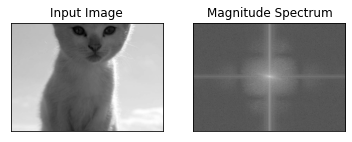

In [21]:
# Blur gambar skala abu-abu dengan filter Gaussian dengan ukuran kernel 10
imBlur = cv.blur(gray_image,(5,5))
# Ubah gambar menjadi domain frekuensi
f = np.fft.fft2(imBlur)
# Bawa komponen frekuensi nol ke tengah
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Langkah 6: Menemukan Tepi dengan Penyaringan High Pass di FFT

Bagian ini menunjukkan melakukan filter lolos tinggi untuk menghapus komponen frekuensi rendah, menghasilkan gambar yang dipertajam yang berisi tepi

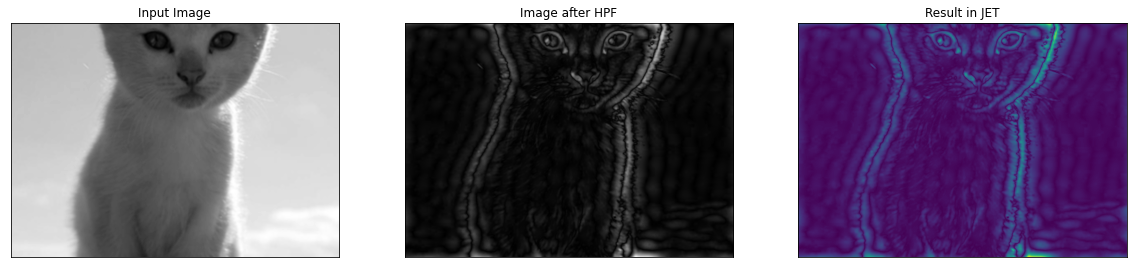

In [22]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# hapus frekuensi rendah dengan ukuran persegi panjang 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()